# Week 8: 資料兼課題

## 0. この資料の目標

第8,9週の授業でソローモデルのシミュレーションを行います。関数定義，高階関数など，やや抽象度の高い機能を使うので，今週はまずは関数の作り方に習熟しましょう。プログラミング学習における認知的な負荷が上がる部分だと思うので，手を動かしながら進めます。


下記の課題I, II, III に答えてください。第8週の授業に参加している方は，授業内で取り組みます。

- コードの一部が `_______` となっているものがあります。これは「穴埋め」問題です。適切なコードに書き換えて実行してください。
- `assert` から始まる文は書いたコードが期待通り動いているかをチェックするためのテスト用コードです。消さないでください。期待通り動いている場合は何も起こりません。
- コードの中には前後に依存関係のあるものがあります。すべてのコードを上から順に実行してください。

### 0.1. 提出方法

MS Teams の対応する課題に ipynb ファイルを添付して提出する。  

- 提出前に Kernel > Restart Kernel and Run All Cells... を実行して，エラーが生じないことを確認してください。

### 0.2. 締切

2020/7/2

### 0.3. 準備

まず，必要なライブラリをインポートしてください。

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

図の画質を上げるために次のコードを実行しておきます。Word ファイルにドラッグ&ドロップで貼り付ける場合などに便利です。  
※ dpi = dot per inch, 1インチにどれだけの点を打つか。

In [2]:
import matplotlib
matplotlib.rcParams['figure.dpi'] = 196

## I. 課題:  関数定義

数学関数を表現する Python の関数を定義しよう。

#### (1) 1変数関数

$$
f(x) = 3x
$$

- $f(10) = ?$  
- $f(-5) = ?$

[解答]

In [4]:
## EXERCISE ## 

def f(x):
    return 3 * x

**[問題]** $f(10)$ と $f(-5)$ を計算してください。

In [5]:
f(10)

30

In [6]:
f(-5)

-15

In [7]:
def h():
    return 10

h()

10

#### (2) 2変数関数

$$
g(x, y) = \frac{x^2}{\sqrt{y}}
$$

- $g(1, 2) = ?$
- $g(8, 9) = ?$

[解答]

In [8]:
## EXERCISE ## 

def g(x, y):
    return x**2 / y**(0.5)

In [9]:
# テスト: エラーが出なければ OK
assert np.allclose(g(3, 4), 4.5)

**[問題]** $g(1,2)$ と $g(8,9)$ を計算してください。

In [10]:
## EXERCISE ## 
g(1, 2)

0.7071067811865475

In [11]:
## EXERCISE ## 
g(8, 9)

21.333333333333332

**[問題]** $f(3) g(1, 2)$ を計算してください。

In [12]:
f(3) * g(1, 2)

6.363961030678928

#### (3)　生産関数（コブダグラス型を一般化したもの）

CES生産関数（収穫一定のケース）

$$
F_{a,r}(K, L, A) = [aK^r + (1-a)(AL)^r]^{1/r}
$$

$a = 0.3$, $r = 0.6$ と特定化する。

In [13]:
a = 0.3
r = 0.6

def Far(K, L, A):
    return (a * K**r + (1 - a) * (A * L)**r)**(1 / r)

In [14]:
# テスト: エラーが出なければ成功
assert np.allclose(Far(1, 1, 1), 1.0)
assert np.allclose(Far(1, 2, 3), 4.157076461754254)
assert np.allclose(Far(3, 2, 1), 2.2829425691845024)

**[問題]** $K, L$ について規模に関する収穫一定が成り立つことを数値的に確認してください。

$$
F_{a,r}(cK, cL, A) = c F_{a, r}(K, L, A), \qquad c \ge 0
$$


$$
F_{a,r}(cK, cL, A) / F_{a, r}(K, L, A) = c 
$$

In [22]:
## EXERCISE ##

K = np.linspace(0.01, 4, 100)  # [0.01, 4.0] を等間隔に分割して 長さ100のベクトルを作る
L = np.linspace(0.01, 4, 100)
K, L = np.meshgrid(K, L)       # 格子上に評価点を用意, K,L は行列になる
A = 5

c = 10
Far(c * K, c * L, A) / Far(K, L, A)

array([[10., 10., 10., ..., 10., 10., 10.],
       [10., 10., 10., ..., 10., 10., 10.],
       [10., 10., 10., ..., 10., 10., 10.],
       ...,
       [10., 10., 10., ..., 10., 10., 10.],
       [10., 10., 10., ..., 10., 10., 10.],
       [10., 10., 10., ..., 10., 10., 10.]])

#### (おまけ) 等高線を描く

`np.meshgrid()` で作った格子状で関数を評価して `plt.contour()` に渡す。色の変え方とかはマニュアル参照。

2変数関数のプロットは `np.meshgrid()` を使うので覚えておこう。（すでに上で実行している）

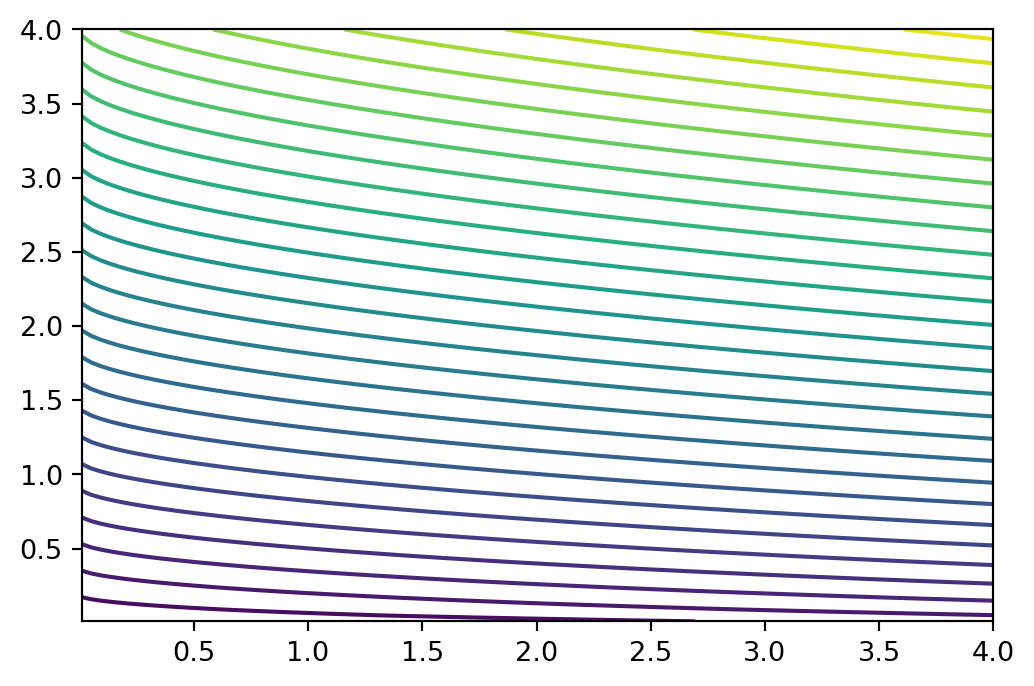

In [23]:
plt.contour(K, L, Far(K, L, A), levels=30);

#### (4) 関数を作る関数

パラメータ $(a, r)$ から CES関数 $F_{ar}$ を作る関数。

$$
\mathrm{CES} : (a, r) \mapsto F_{a,r}
$$


In [24]:
def CES(a, r):
    def Far(K, L, A):
        return (a * K**r + (1 - a) * (A * L)**r)**(1 / r)
    return Far

この関数 `CES` を使って $F_{0.5, 0.5}$ を定義してください。

In [25]:
F0505 = CES(0.5, 0.5)

普通の関数と同じように使うことができます。

In [26]:
F0505(1, 2, 3)

2.9747448713915885

#### (おまけ) 等高線図をたくさん描く

高階関数を作っておくと，色々な $a$, $r$ の値の組合せの図を作るときに便利。

$a$ と $r$ の関係が見えるだろうか？

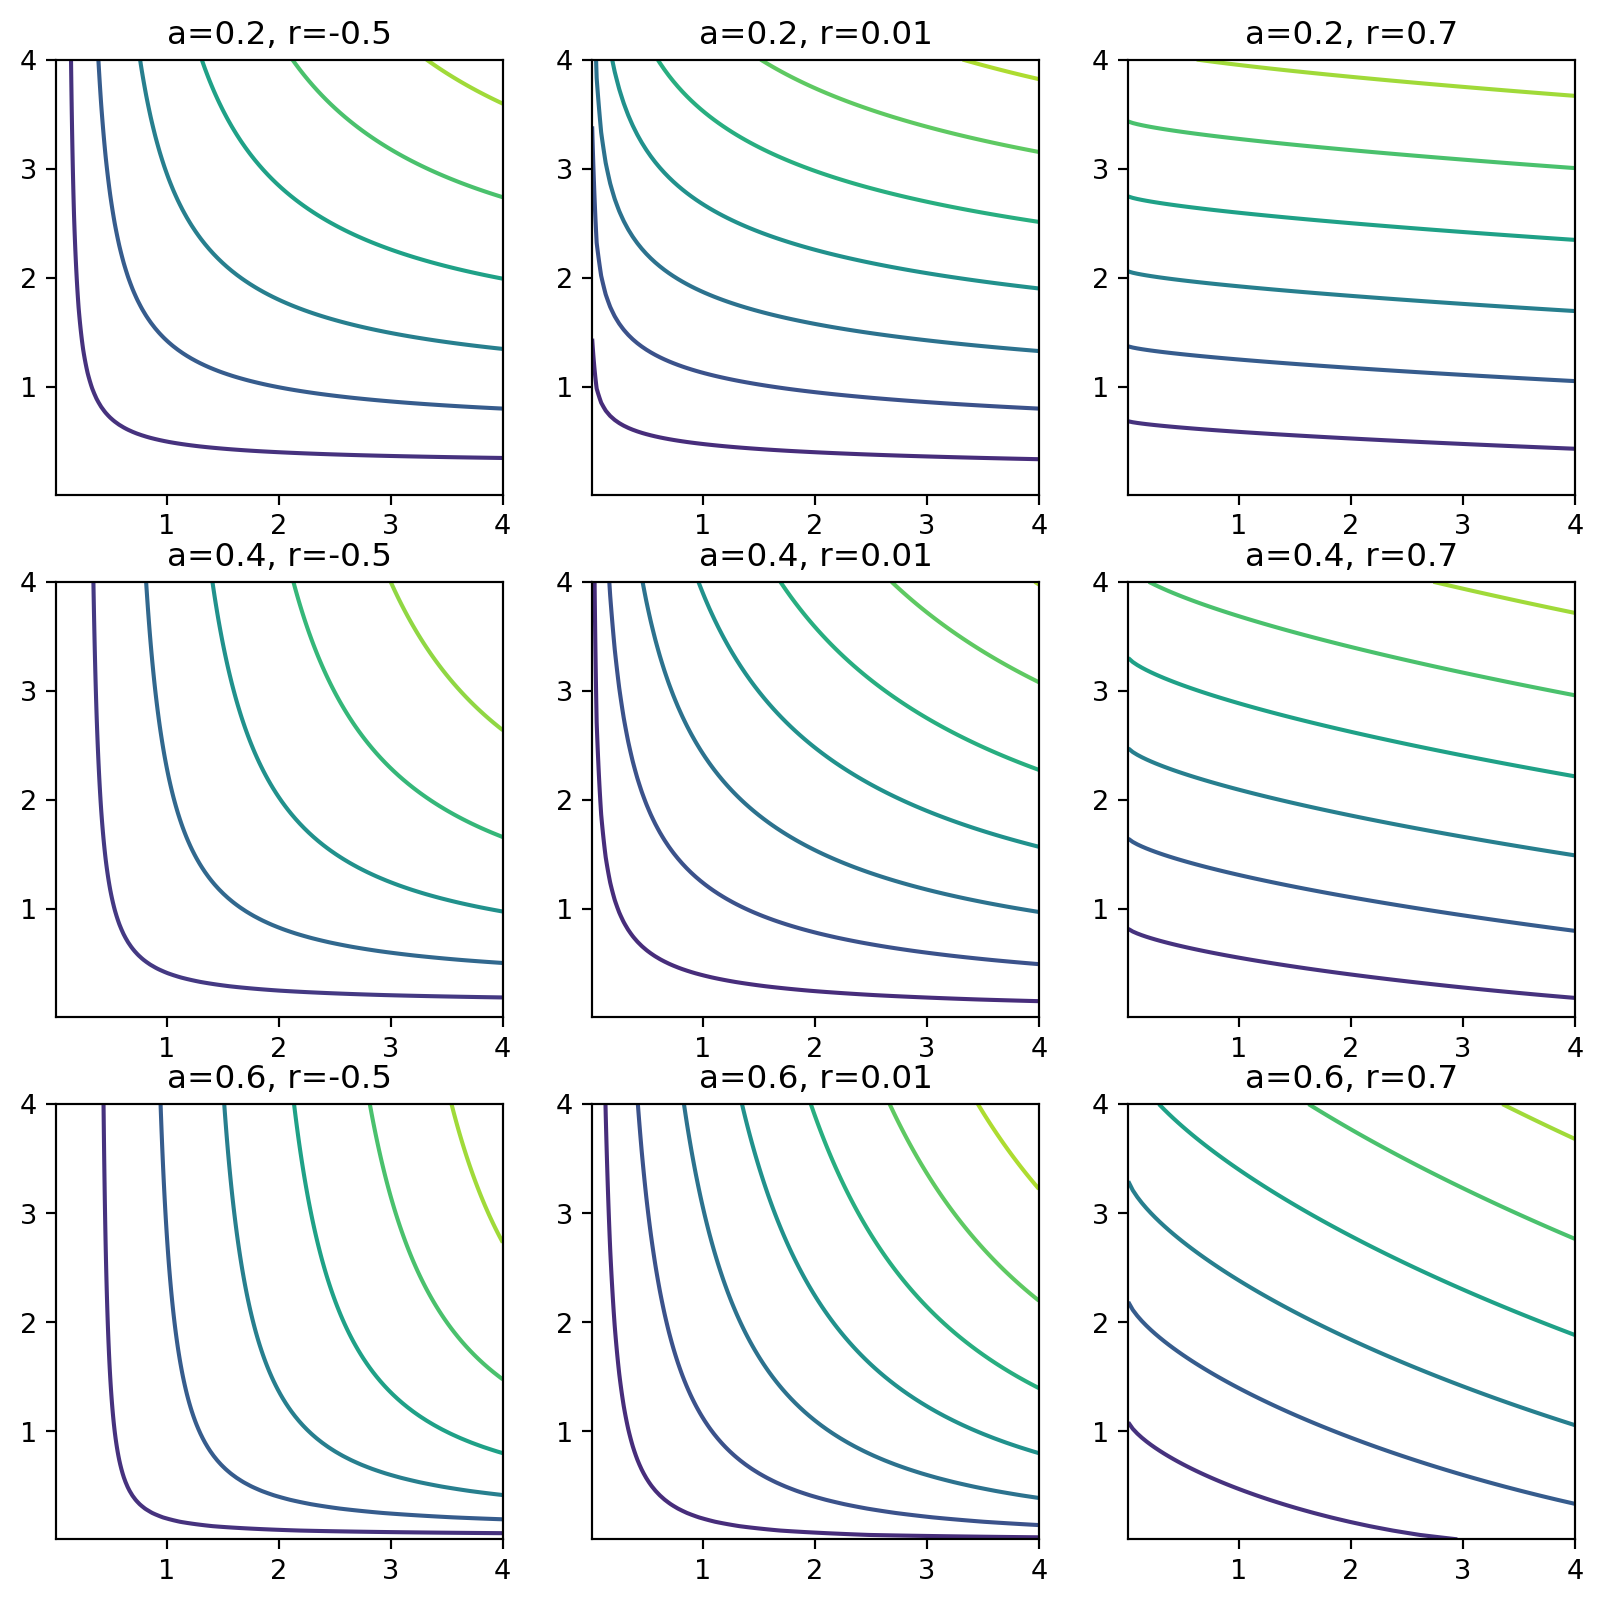

In [27]:
av = [0.2, 0.4, 0.6]
rv = [-0.5, 0.01, 0.7]

fig, axes = plt.subplots(len(av), len(rv), figsize=(10, 10))

# enumerate() を使う方がよかった

for i in range(len(av)):
    for j in range(len(rv)):
        axes[i, j].contour(K, L, CES(av[i], rv[j])(K, L, A))
        axes[i, j].set_title(f'a={av[i]}, r={rv[j]}')

## II. 課題: 価格指数の計算

価格指数の計算を関数化しておきましょう。（期末試験対策！）

関数を作るときには，

- 使用法
- 汎用性
- 安全性
- 名称
- ドキュメンテーションの必要性

などを考えておくことが重要です。

### 使用法を想定する


例えば，`price`, `quantity` を　Numpy 配列と想定して，

```python
laspeyres(price, quantity)
paasche(price, quantity)
```

とするとか，同じ期の価格と数量をまとめた方がわかりやすい場合には，


```python
laspeyres([p0, q0], [p1, q1], [p2, q2])
```

とするという手もあるかもしれません。


あるいは，`laspeyres`, `paasche` などと関数を分けずに，

```python
price_index(price, quantity, method="paasche")
```

引数を変えると計算方法が変わるように作ることもできます。もっと言えば，価格指数の計算公式で価格・数量を反転させれば数量も計算できることを考えると，

```python
chained_index(target, weight, method="paasche", initial=100.)
```

と書けるようにしておいて，


`chained_index(price, quantity)` で価格指数， `compute_index(quantity, price)` で数量指数が計算できるようにしておくのもよいかもしれません。

### 汎用性

`price`, `quantity` を関数にわたす前に，`np.array` で Numpy 配列に変換する必要があるのか，あるいは，リストのリストを渡せば関数内部で必要な変換を行うようにするのか？

こういった重要な設計上の方針を決定する必要があります。汎用性は管理しやすさとトレードオフがあるので，小さな仕事をする関数をたくさん組み合わせる方がよいかもしれません。（個人的な意見です）


### 安全性

先程書いた「安全性」というのは，例えば「`method="paasche"`」の代わりに `method="pasche"` と書いた場合にどう振る舞うか？という考え方に関係しています。本来許されないはずの引数が渡されたときにエラーを発出するか，あるいはよくわからない計算結果を出すか，どちらが「安全」でしょうか？

安全性と管理のしやすさにもトレードオフがあるので，個人プロジェクトで使う小さな関数にガチガチのエラーチェック（「例外処理」といいます）を入れるのは好ましくありません。

関数のユーザーが入力に入るべき値を理解している環境かどうかを把握して設計します。


### 名称

関数に与えられた仕事を明確に表す，英語の関数名をつけます。

複数の単語をつなぐ方法には

- スネークケース（蛇のニョロニョロのイメージ）: snake_case, camel_case
- キャメルケース（ラクダのコブ）: snakeCase, camelCase

の2つがあります。Python の関数名にはスネークケースがよく使われます。

引数にも役割を表す明確な名前をつけます。英単語が望ましいです。付属資料の数式と対応している場合には，数式と同じ記号を使っても構いません。


### ドキュメンテーション

重要な関数はドキュメンテーションを自分のために残しておくとよいでしょう。
関数の中に，複数行のテキストの記法 `""" .... """` を使って書きます。


### 関数定義の例

In [28]:
def chained_index(target, weight, method="laspeyres", initial=100.):
    """Compute index numbers.
    
    Parameters
    ----------
    target : array
        Array with shape (n, k), data for n years and for k goods.
        
        
    weight : array
        Array with shape (n, k), data for n years and for k goods.
    method [str] paasche, laspeyres, or fisher
    
    Returns
    -------
    Chained index numbers, ndarray with shape (n, ).
            
    """
    
    T = target.shape[0]
    
    def paasche():
        index = np.empty(T)
        index[0] = initial
        for t in range(1, T):
            index[t] = index[t-1] * (
                            np.sum(target[t, :] * weight[t, :]) 
                           / np.sum(target[t-1, :] * weight[t, :]))
        return index
    
    def laspeyres():
        index = np.empty(T)
        index[0] = initial
        for t in range(1, T):
            index[t] = index[t-1] * (
                            np.sum(target[t, :] * weight[t-1, :]) 
                           / np.sum(target[t-1, :] * weight[t-1, :]))
        return index
    
    
    if method.lower() == "paasche":
        return paasche()
    elif method.lower() == "laspeyres":
        return laspeyres()
    elif method.lower() == "fisher":
        return np.sqrt(paashe() * laspeyres())
    else:
        raise("Possible options for method argument: 'paasche', 'laspeyres', or 'fisher'")

### 使用例

#### week03.pdf, p. 28 の例

In [29]:
price28 = np.array([[40, 80], [80, 30]])
quantity28 = np.array([[3, 6], [5, 7]])

chained_index(price28, quantity28, method="laspeyres", initial=1.)

array([1. , 0.7])

#### week03.pdf, p. 30の例

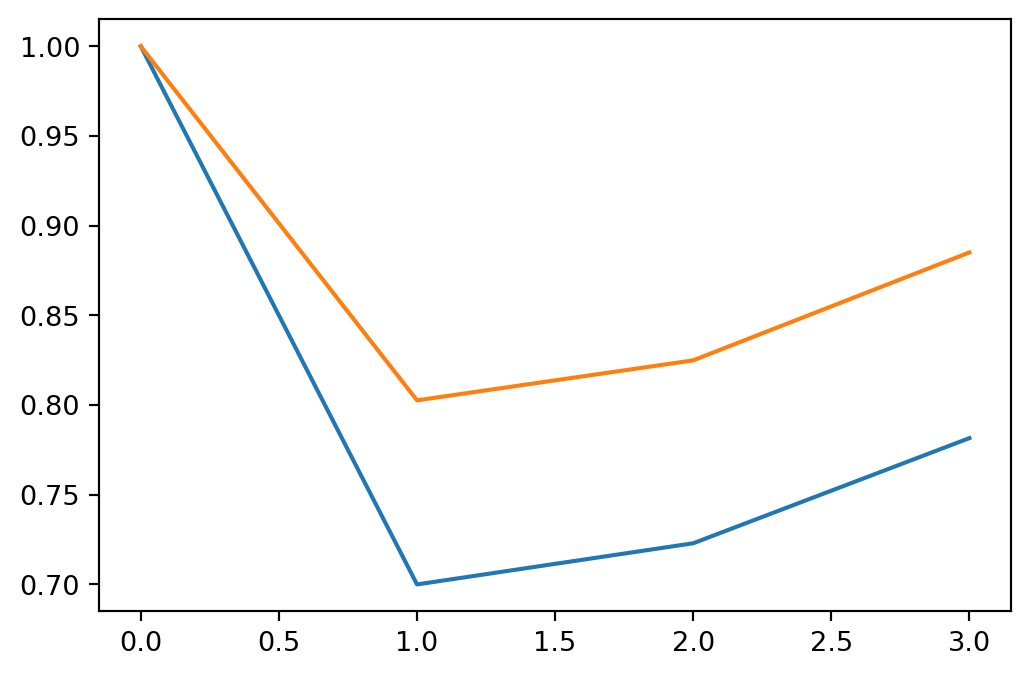

In [30]:
price30 = np.array([[40, 80], [80, 30], [70, 40], [60, 55]])
quantity30 = np.array([[3, 6], [5, 7], [6, 8], [8, 10]])

PL = chained_index(price30, quantity30, method="laspeyres", initial=1.)
PP = chained_index(price30, quantity30, method="paasche", initial=1.)

plt.plot(PL, label="laspeyres")
plt.plot(PP, label="paasche")

#### 実質GDP, week04.pdf, p.15 の例

In [31]:
price15 = np.array([[100, 100, 100],
                    [101, 99, 103],
                    [100, 98, 104],
                    [99, 97, 106.]])
quantity15 = np.array([[1000, 2000, 500],
                       [980, 1980, 510],
                       [1010, 1990, 520],
                       [1005, 2005, 530.]])

連鎖方式の実質GDPは

- 数量指数（数量が target）
- Laspeyres 指数
- 初期値が基準年の名目GDPである。

これに注意して計算してみよう。

In [32]:
chained_index(quantity15, price15, method="laspeyres", 
              initial=np.dot(price15[0, :], quantity15[0, :]))

array([350000.        , 347000.        , 352042.2985066 , 354063.44966341])

## III. 課題: 格差の指標の計算

所得の Numpy array `x` が与えられたときに，

- 相対的貧困率を計算する `relative_poverty`
- Gini係数を計算する `gini`

を定義しよう。

参考: 
- https://github.com/kenjisato/MaD/blob/master/Lecture%20Slides/week05.pdf
- https://github.com/kenjisato/MaD/blob/master/Jupyter/week05.ipynb

#### 相対的貧困

In [ ]:
def relative_poverty(x):
    """Computes relative poverty rate"""
    
    

In [ ]:
## TEST ##
y = np.array([404.145188, 404.145188, 404.145188, 707.106781, 707.106781, 250, 150])
assert np.allclose(relative_poverty(y), 14.285714285714285)

#### Gini 係数

In [ ]:
def gini(x):
    """Computes Gini coefficient"""
    

In [ ]:
## TEST ##
y = np.array([ 46.,  10.,  37.,  38.,  17.,  30.,  49.,  37.,  21.,  22., 155.,
               97., 149., 148., 151., 172., 144., 166., 199.,  95.])
assert np.allclose(gini(y), 0.39189568143578235)